[Dataset](https://catalog.data.gov/dataset/2010-census-populations-by-zip-code) is 2010 Census Profile of General Population and Housing Characteristics. Zip codes are limited to those that fall at least partially within LA city boundaries. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2010_Census_Populations_by_Zip_Code.csv')
print(df.head())

   Zip Code  Total Population  Median Age  Total Males  Total Females  \
0     91371                 1        73.5            0              1   
1     90001             57110        26.6        28468          28642   
2     90002             51223        25.5        24876          26347   
3     90003             66266        26.3        32631          33635   
4     90004             62180        34.8        31302          30878   

   Total Households  Average Household Size  
0                 1                    1.00  
1             12971                    4.40  
2             11731                    4.36  
3             15642                    4.22  
4             22547                    2.73  


In [3]:
# take one line and make a series
series = pd.Series(df.loc[0])
print(series)

Zip Code                  91371.0
Total Population              1.0
Median Age                   73.5
Total Males                   0.0
Total Females                 1.0
Total Households              1.0
Average Household Size        1.0
Name: 0, dtype: float64


In [4]:
# slicing
series['Zip Code':'Median Age']

Zip Code            91371.0
Total Population        1.0
Median Age             73.5
Name: 0, dtype: float64

In [5]:
series[::-2]

Average Household Size        1.0
Total Females                 1.0
Median Age                   73.5
Zip Code                  91371.0
Name: 0, dtype: float64

In [6]:
# masking
series[series > 1]

Zip Code      91371.0
Median Age       73.5
Name: 0, dtype: float64

In [7]:
# indexing 
series[['Zip Code', 'Total Households']]

Zip Code            91371.0
Total Households        1.0
Name: 0, dtype: float64

In [8]:
# loc always refers to explicit index, while iloc is implicit
series.loc['Median Age']

73.5

In [9]:
series.iloc[0:3]

Zip Code            91371.0
Total Population        1.0
Median Age             73.5
Name: 0, dtype: float64

In [10]:
# access columns of dataframe as series
type(df['Median Age'])

pandas.core.series.Series

In [11]:
df['word'] = df['Median Age']
# can accces df column with attribute style as well (needs to be 1 word?)
df.word.head()

0    73.5
1    26.6
2    25.5
3    26.3
4    34.8
Name: word, dtype: float64

In [12]:
# convert dataframe to 2d numpy array
df.values

array([[  9.13710000e+04,   1.00000000e+00,   7.35000000e+01, ...,
          1.00000000e+00,   1.00000000e+00,   7.35000000e+01],
       [  9.00010000e+04,   5.71100000e+04,   2.66000000e+01, ...,
          1.29710000e+04,   4.40000000e+00,   2.66000000e+01],
       [  9.00020000e+04,   5.12230000e+04,   2.55000000e+01, ...,
          1.17310000e+04,   4.36000000e+00,   2.55000000e+01],
       ..., 
       [  9.35600000e+04,   1.89100000e+04,   3.24000000e+01, ...,
          6.46900000e+03,   2.92000000e+00,   3.24000000e+01],
       [  9.35630000e+04,   3.88000000e+02,   4.45000000e+01, ...,
          1.03000000e+02,   2.53000000e+00,   4.45000000e+01],
       [  9.35910000e+04,   7.28500000e+03,   3.09000000e+01, ...,
          1.98200000e+03,   3.67000000e+00,   3.09000000e+01]])

In [13]:
# indexing again with iloc and loc, and also with ix
df.iloc[:2, :3]

,Zip Code,Total Population,Median Age
0,91371,1,73.5
1,90001,57110,26.6


In [14]:
# remember loc is inclusive of endpoints unlike iloc
df.loc[:5, :'Total Households'] 

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households
0,91371,1,73.5,0,1,1
1,90001,57110,26.6,28468,28642,12971
2,90002,51223,25.5,24876,26347,11731
3,90003,66266,26.3,32631,33635,15642
4,90004,62180,34.8,31302,30878,22547
5,90005,37681,33.9,19299,18382,15044


In [15]:
# ix allows a combination of iloc and loc but is deprecated
df.ix[:5, :3]

/home/dan/venv3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Zip Code,Total Population,Median Age
0,91371,1,73.5
1,90001,57110,26.6
2,90002,51223,25.5
3,90003,66266,26.3
4,90004,62180,34.8
5,90005,37681,33.9


In [16]:
# indexing refers to columns, but slicing is for rows
df[20:25]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,word
20,90021,3951,44.3,2790,1161,1561,1.57,44.3
21,90022,67179,29.8,33216,33963,17023,3.94,29.8
22,90023,45903,28.4,23037,22866,10727,4.26,28.4
23,90024,47452,23.6,22248,25204,17903,2.03,23.6
24,90025,42147,34.7,20859,21288,21228,1.97,34.7


In [17]:
# also masking
df[(df['Total Population'] > 40000) & (df['Median Age'] < 27)]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,word
1,90001,57110,26.6,28468,28642,12971,4.40,26.6
2,90002,51223,25.5,24876,26347,11731,4.36,25.5
3,90003,66266,26.3,32631,33635,15642,4.22,26.3
7,90007,40920,24.0,20915,20005,11944,3.00,24.0
10,90011,103892,26.2,52794,51098,22168,4.67,26.2
23,90024,47452,23.6,22248,25204,17903,2.03,23.6
51,90059,40952,25.7,19623,21329,9596,4.19,25.7
74,90221,53704,26.7,26346,27358,11630,4.57,26.7


In [18]:
# convert string to datetime format!! 
pd.to_datetime('July 4th, 2017')

Timestamp('2017-07-04 00:00:00')

In [19]:
# it's magic
pd.to_datetime('4th of July 2017')

Timestamp('2017-07-04 00:00:00')

In [20]:
# nice
pd.to_datetime('2017 July 4')

Timestamp('2017-07-04 00:00:00')

In [21]:
# todo4, trying other data
df_songs = pd.read_csv('Top_1000_Songs_To_Hear_Before_You_Die_AndrewRyan.csv')
print(df_songs.head())

  THEME                TITLE           ARTIST  YEAR  \
0  Love     The Look of Love              ABC  1982   
1  Love          The Shining  Badly Drawn Boy  2000   
2  Love       God Only Knows   The Beach Boys  1966   
3  Love      Good Vibrations   The Beach Boys  1966   
4  Love  Wouldn’t It Be Nice   The Beach Boys  1966   

                                         SPOTIFY_URL  
0  http://open.spotify.com/track/78j3qTBdzcIiT3eS...  
1  http://open.spotify.com/track/2PojSoZ94AIzp7fs...  
2  http://open.spotify.com/track/0ObrXLrfrqJUNc8R...  
3  http://open.spotify.com/track/2oF7FZHIJbzjeEXZ...  
4  http://open.spotify.com/track/0cx32rX0uZvcJUP9...  


In [22]:
# only 994 rows? missing 6 songs!
df_songs.plot(kind='hist')

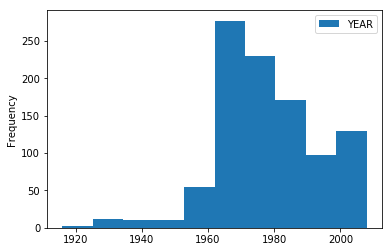

In [23]:
import matplotlib.pyplot as plt
plt.show() # plotting year, only numeric column

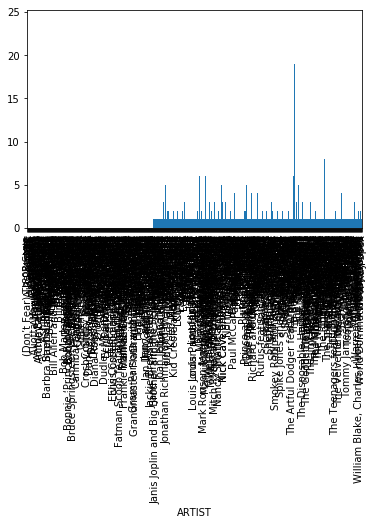

In [24]:
df_songs.groupby(['ARTIST']).size().plot(kind='bar')
plt.show() # yikes

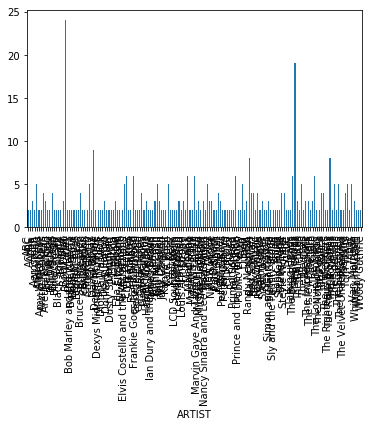

In [25]:
artist_series = df_songs.groupby(['ARTIST']).size()
artist_series[artist_series > 1].plot(kind='bar')
plt.show() # slightly cleaner

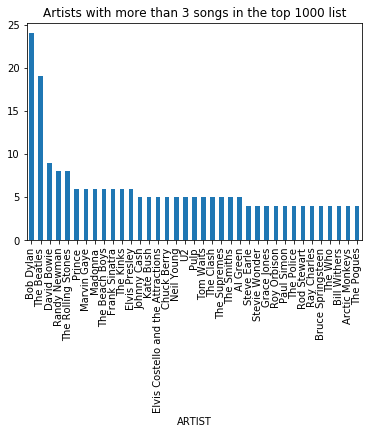

In [26]:
artist_series = df_songs.groupby(['ARTIST']).size()
artist_series_three = artist_series[artist_series > 3].sort_values(ascending=False)
artist_series_three.plot(kind='bar')
plt.title('Artists with more than 3 songs in the top 1000 list')
plt.show() # much better!

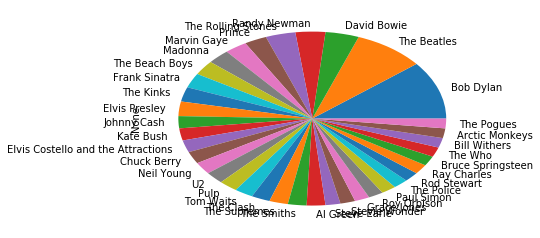

In [27]:
artist_series_three.plot(kind='pie')
plt.show()